# FACE IDENTIFICATION WHEN WEARING AND NOT WEARING A MASK

# TRAN QUANG HUY 19146195 

In [1]:
# Import Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2 as cv
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import pandas as pd # Xu lý bảng
import seaborn as sns # Vẽ biểu đồ thị của dữ liệu
from sklearn.preprocessing import StandardScaler # Xử lý chuẩn hóa dữ liệu
from sklearn.model_selection import train_test_split # Chia dữ liệu ra làm 2 phần
from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM    # LSTM  biên dạng ANN, BatchNormalization: cho nhỏ lại
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical # Sử dung để làm nổi đối tượng cần phân loại
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from tensorflow.keras.preprocessing import image
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn import preprocessing
import keras
from tensorflow.keras.optimizers import RMSprop # toi uu
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

# Tạo các biến 

In [2]:
# Important variables 
input_size = [150,150]
batch = 32

input_shape = (150,150,3)
maxpooling_size = (2,2)

# Data preprocessing

# WearMask 

In [3]:
# WITH MASK
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2,shear_range=0.2, zoom_range = 0.2,)    

train_dataset_wearmask = image_generator.flow_from_directory(batch_size=batch,
                                                 directory='../input/cl3dataset-final/DATASET_FINAL_19146195/DATASET_FINAL_19146195/DATASET_5P_FINAL/WITHMASK',
                                                 shuffle=True,
                                                 target_size= input_size, 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset_wearmask = image_generator.flow_from_directory(batch_size=batch,
                                                 directory='../input/cl3dataset-final/DATASET_FINAL_19146195/DATASET_FINAL_19146195/DATASET_5P_FINAL/WITHMASK',
                                                 shuffle=True,
                                                 target_size=input_size, 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 2095 images belonging to 5 classes.
Found 522 images belonging to 5 classes.


In [4]:
train_dataset_wearmask[0][0]

array([[[[0.69411767, 0.69803923, 0.6666667 ],
         [0.69411767, 0.69803923, 0.6666667 ],
         [0.69411767, 0.69803923, 0.6666667 ],
         ...,
         [0.7294118 , 0.7294118 , 0.69803923],
         [0.7294118 , 0.7294118 , 0.69803923],
         [0.7294118 , 0.7294118 , 0.69803923]],

        [[0.69411767, 0.69803923, 0.6666667 ],
         [0.69411767, 0.69803923, 0.6666667 ],
         [0.69411767, 0.69803923, 0.6666667 ],
         ...,
         [0.7294118 , 0.7294118 , 0.69803923],
         [0.7294118 , 0.7294118 , 0.69803923],
         [0.7294118 , 0.7294118 , 0.69803923]],

        [[0.69411767, 0.69803923, 0.6666667 ],
         [0.69411767, 0.69803923, 0.6666667 ],
         [0.69411767, 0.69803923, 0.6666667 ],
         ...,
         [0.7294118 , 0.7294118 , 0.69803923],
         [0.7294118 , 0.7294118 , 0.69803923],
         [0.7294118 , 0.7294118 , 0.69803923]],

        ...,

        [[0.3019608 , 0.34117648, 0.34509805],
         [0.3019608 , 0.34117648, 0.34509805]

In [5]:
train_dataset_wearmask.class_indices

{'BHUY_MASK': 0,
 'DHUNG_MASK': 1,
 'DTAI_MASK': 2,
 'MTUAN_MASK': 3,
 'QHUY_MASK': 4}

# Without Mask

In [7]:
# WITHOUT MASK 
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2,shear_range=0.2, zoom_range = 0.2,)    

train_dataset_withoutmask = image_generator.flow_from_directory(batch_size=batch,
                                                 directory='../input/cl3dataset-final/DATASET_FINAL_19146195/DATASET_FINAL_19146195/DATASET_5P_FINAL/WITHOUT MASK',
                                                 shuffle=True,
                                                 target_size= input_size, 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset_withoutmask = image_generator.flow_from_directory(batch_size=batch,
                                                 directory='../input/cl3dataset-final/DATASET_FINAL_19146195/DATASET_FINAL_19146195/DATASET_5P_FINAL/WITHOUT MASK',
                                                 shuffle=True,
                                                 target_size=input_size, 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 1593 images belonging to 5 classes.
Found 396 images belonging to 5 classes.


In [8]:
train_dataset_withoutmask[0][0]

array([[[[0.5611823 , 0.627849  , 0.7012592 ],
         [0.55087394, 0.61621034, 0.6939766 ],
         [0.53759265, 0.5965777 , 0.6711682 ],
         ...,
         [0.53789145, 0.6084797 , 0.6163228 ],
         [0.5239238 , 0.5945121 , 0.6034882 ],
         [0.5195338 , 0.59012204, 0.6033453 ]],

        [[0.55381507, 0.6204818 , 0.6932357 ],
         [0.5446041 , 0.6099405 , 0.68619615],
         [0.5365527 , 0.5955377 , 0.6700909 ],
         ...,
         [0.54511476, 0.615703  , 0.62311107],
         [0.5322751 , 0.6028633 , 0.6096264 ],
         [0.52442414, 0.59501237, 0.60180265]],

        [[0.54456854, 0.61123526, 0.6816665 ],
         [0.53644735, 0.6016741 , 0.67267907],
         [0.5336184 , 0.59197736, 0.6670237 ],
         ...,
         [0.5593034 , 0.62989163, 0.6347113 ],
         [0.5407712 , 0.6113594 , 0.6116674 ],
         [0.5396318 , 0.61022   , 0.6106881 ]],

        ...,

        [[0.41706637, 0.44451734, 0.4787119 ],
         [0.41898838, 0.44444397, 0.48472753]

In [9]:
train_dataset_withoutmask.class_indices

{'BHUY_WITHOUTMASK': 0,
 'DHUNG_WITHOUTMASK': 1,
 'DTAI_WITHOUTMASK': 2,
 'MTUAN_WITHOUTMASK': 3,
 'QHUY_WITHOUTMASK': 4}

# Tạo mạng Nơ ron

# Wear mask

In [11]:
# from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input,MaxPooling2D
mask_model = Sequential()
mask_model.add(Conv2D(128,(3,3), kernel_initializer='he_uniform',padding='same', activation='relu', input_shape=(150,150,3)))
#mask_model.add(Conv2D(128, kernel_size=3, activation='relu'))
# mask_model.add(MaxPool2D(pool_size=3, strides=2))
mask_model.add(MaxPooling2D((2,2)))


mask_model.add(Conv2D(128,(3,3),kernel_initializer='he_uniform',padding='same', activation='relu'))
#mask_model.add(Conv2D(128, kernel_size=3, activation='relu'))
# mask_model.add(MaxPool2D(pool_size=3, strides=2))
mask_model.add(MaxPooling2D((2,2)))

              
mask_model.add(Conv2D(256,(3,3),kernel_initializer='he_uniform',padding='same', activation='relu'))
#mask_model.add(Conv2D(256, kernel_size=3, activation='relu'))
# mask_model.add(MaxPool2D(pool_size=3, strides=2))
mask_model.add(MaxPooling2D((2,2)))


# mask_model.add(Conv2D(512, (3,3),kernel_initializer='he_uniform',padding='same', activation='relu'))
# mask_model.add(Conv2D(512, kernel_size=3, activation='relu'))
# mask_model.add(MaxPool2D(pool_size=3, strides=2))
# mask_model.add(MaxPooling2D((2,2)))


from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

mask_model.add(Flatten())
mask_model.add(Dropout(0.5))
mask_model.add(Dense(128,activation='relu'))
mask_model.add(Dense(512, activation='relu')) 


mask_model.add(Dense(5,activation='softmax', name ='wearmask'))

mask_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 128)     3584      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 128)       147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 256)       295168    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 256)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 82944)            

# Without Mask

In [12]:
# from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input,MaxPooling2D
withoutmask_model = Sequential()
withoutmask_model.add(Conv2D(128,(3,3), kernel_initializer='he_uniform',padding='same', activation='relu', input_shape=(150,150,3)))
#withoutmask_model.add(Conv2D(128, kernel_size=3, activation='relu'))
# withoutmask_model.add(MaxPool2D(pool_size=3, strides=2))
withoutmask_model.add(MaxPooling2D((2,2)))

withoutmask_model.add(Conv2D(128,(3,3),kernel_initializer='he_uniform',padding='same', activation='relu'))
#mask_model.add(Conv2D(128, kernel_size=3, activation='relu'))
# mask_model.add(MaxPool2D(pool_size=3, strides=2))
withoutmask_model.add(MaxPooling2D((2,2)))

              
withoutmask_model.add(Conv2D(256,(3,3),kernel_initializer='he_uniform',padding='same', activation='relu'))
#withoutmask_model.add(Conv2D(256, kernel_size=3, activation='relu'))
# withoutmask_model.add(MaxPool2D(pool_size=3, strides=2))
withoutmask_model.add(MaxPooling2D((2,2)))

# withoutmask_model.add(Conv2D(512, (3,3),kernel_initializer='he_uniform',padding='same', activation='relu'))
# withoutmask_model.add(Conv2D(512, kernel_size=3, activation='relu'))
# withoutmask_model.add(MaxPool2D(pool_size=3, strides=2))
# withoutmask_model.add(MaxPooling2D((2,2)))

from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
withoutmask_model.add(Flatten())
withoutmask_model.add(Dropout(0.5))
withoutmask_model.add(Dense(128,activation='relu'))
withoutmask_model.add(Dense(512, activation='relu')) 
withoutmask_model.add(Dense(5,activation='softmax', name ='wearmask'))

withoutmask_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 150, 150, 128)     3584      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 75, 75, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 75, 75, 128)       147584    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 37, 37, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 37, 37, 256)       295168    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 18, 18, 256)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 82944)            

# TRAIN MODEL

##  WITH MASK 

In [14]:
from tensorflow.keras.optimizers import SGD
opt = SGD(learning_rate = 0.001, momentum = 0.9)
mask_model.compile(optimizer = opt, loss ='categorical_crossentropy', metrics = ['accuracy'])
history_mask=mask_model.fit(train_dataset_wearmask,batch_size=batch,epochs=200, verbose=1,validation_data=validation_dataset_wearmask)

Epoch 1/200
66/66 [==============================] - 24s 364ms/step - loss: 1.2390 - accuracy: 0.5084 - val_loss: 1.3844 - val_accuracy: 0.4770
Epoch 2/200
66/66 [==============================] - 17s 252ms/step - loss: 0.6969 - accuracy: 0.7527 - val_loss: 1.4220 - val_accuracy: 0.6169
Epoch 3/200
66/66 [==============================] - 16s 249ms/step - loss: 0.4669 - accuracy: 0.8496 - val_loss: 1.5283 - val_accuracy: 0.6130
Epoch 4/200
66/66 [==============================] - 17s 252ms/step - loss: 0.3097 - accuracy: 0.9012 - val_loss: 1.3814 - val_accuracy: 0.6437
Epoch 5/200
66/66 [==============================] - 16s 249ms/step - loss: 0.1715 - accuracy: 0.9527 - val_loss: 1.5043 - val_accuracy: 0.6590
Epoch 6/200
66/66 [==============================] - 16s 250ms/step - loss: 0.1438 - accuracy: 0.9561 - val_loss: 1.3469 - val_accuracy: 0.6935
Epoch 7/200
66/66 [==============================] - 16s 246ms/step - loss: 0.1090 - accuracy: 0.9666 - val_loss: 1.3374 - val_accuracy:

## Save model 1

In [15]:
mask_model.save('Final_200M2006_2.h5')

## WITHOUT MASK

In [16]:
from tensorflow.keras.optimizers import SGD
opt = SGD(learning_rate = 0.001, momentum = 0.9)
withoutmask_model.compile(optimizer = opt, loss ='categorical_crossentropy', metrics = ['accuracy'])
history_withoutmask=withoutmask_model.fit(train_dataset_withoutmask,batch_size=batch,epochs=200,verbose=1,validation_data=validation_dataset_withoutmask)

Epoch 1/200
50/50 [==============================] - 23s 449ms/step - loss: 1.3768 - accuracy: 0.4131 - val_loss: 1.2670 - val_accuracy: 0.4949
Epoch 2/200
50/50 [==============================] - 12s 243ms/step - loss: 0.8745 - accuracy: 0.6849 - val_loss: 0.9231 - val_accuracy: 0.6338
Epoch 3/200
50/50 [==============================] - 13s 253ms/step - loss: 0.5128 - accuracy: 0.8293 - val_loss: 0.7154 - val_accuracy: 0.7525
Epoch 4/200
50/50 [==============================] - 12s 237ms/step - loss: 0.2839 - accuracy: 0.9146 - val_loss: 0.4692 - val_accuracy: 0.8333
Epoch 5/200
50/50 [==============================] - 12s 240ms/step - loss: 0.1821 - accuracy: 0.9422 - val_loss: 0.5548 - val_accuracy: 0.8030
Epoch 6/200
50/50 [==============================] - 13s 253ms/step - loss: 0.1315 - accuracy: 0.9611 - val_loss: 0.4112 - val_accuracy: 0.8434
Epoch 7/200
50/50 [==============================] - 12s 240ms/step - loss: 0.0825 - accuracy: 0.9736 - val_loss: 0.3251 - val_accuracy:

## Save model 2

In [18]:
withoutmask_model.save('Final_200W2006_2.h5')

# PLOT

## With Mask

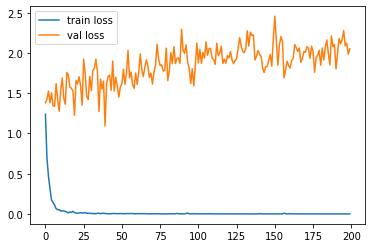

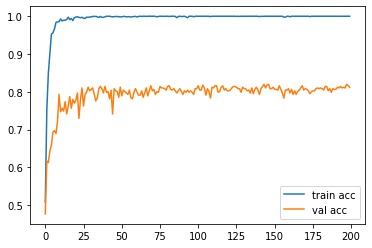

<Figure size 432x288 with 0 Axes>

In [19]:
# plot the loss
import matplotlib.pyplot as plt
history = history_mask
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

## Without Mask

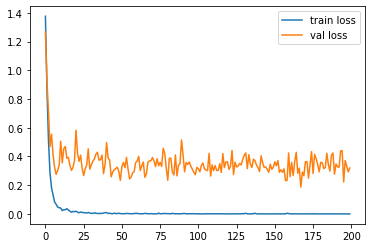

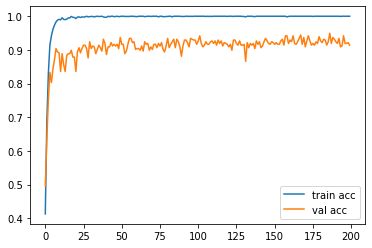

<Figure size 432x288 with 0 Axes>

In [20]:
# plot the loss
import matplotlib.pyplot as plt
history = history_withoutmask
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [21]:
# # plot the loss
# import matplotlib.pyplot as plt
# history = history_stranger
# plt.plot(history.history['loss'], label='train loss')
# plt.plot(history.history['val_loss'], label='val loss')
# plt.legend()
# plt.show()
# plt.savefig('LossVal_loss')

# # plot the accuracy
# plt.plot(history.history['accuracy'], label='train acc')
# plt.plot(history.history['val_accuracy'], label='val acc')
# plt.legend()
# plt.show()
# plt.savefig('AccVal_acc')

array(['QHUY_MASK - 19146195'], dtype='<U21')

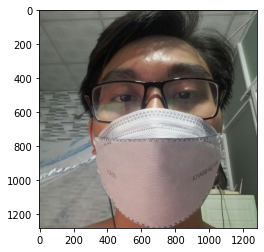

In [22]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/demo_test/TEST (4).jpg"

model = mask_model
predict = ['BHUY_MASK - 19146194',
 'DHUNG_MASK - 19146016',
 'DTAI_MASK - 19146255 ',
 'MTUAN_MASK - 19146297',
 'QHUY_MASK - 19146195',]
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

array(['QHUY_MASK - 19146195'], dtype='<U21')

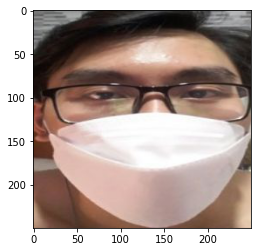

In [23]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/HUY_TEST/huy_mm (1)t.jpg"

model = mask_model
predict = ['BHUY_MASK - 19146194',
 'DHUNG_MASK - 19146016',
 'DTAI_MASK - 19146255 ',
 'MTUAN_MASK - 19146297',
 'QHUY_MASK - 19146195',]
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

array(['QHUY_WITHOUTMASK -19146195'], dtype='<U28')

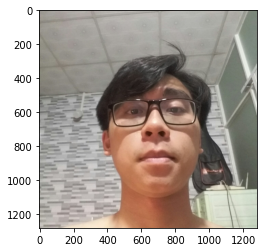

In [24]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/huy0906 (4).jpg"

model = withoutmask_model
predict = ['BHUY_WITHOUTMASK - 19146194',
 'DHUNG_WITHOUTMASK - 19146016',
 'DTAI_WITHOUTMASK 19146255',
 'MTUAN_WITHOUTMASK -19146297',
 'QHUY_WITHOUTMASK -19146195']
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

array(['DTAI_WITHOUTMASK 19146255'], dtype='<U28')

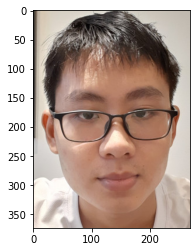

In [26]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/demo_test/TEST (2).jpg"

model = withoutmask_model
predict = ['BHUY_WITHOUTMASK - 19146194',
 'DHUNG_WITHOUTMASK - 19146016',
 'DTAI_WITHOUTMASK 19146255',
 'MTUAN_WITHOUTMASK -19146297',
 'QHUY_WITHOUTMASK -19146195']
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

array(['MTUAN_WITHOUTMASK -19146297'], dtype='<U28')

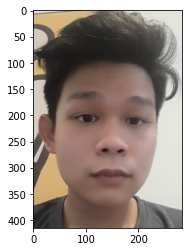

In [28]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/demo_test/TEST (1).jpg"

model = withoutmask_model
predict = ['BHUY_WITHOUTMASK - 19146194',
 'DHUNG_WITHOUTMASK - 19146016',
 'DTAI_WITHOUTMASK 19146255',
 'MTUAN_WITHOUTMASK -19146297',
 'QHUY_WITHOUTMASK -19146195']
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

array(['QHUY_MASK - 19146195'], dtype='<U21')

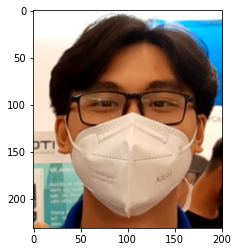

In [30]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/QhuyMask (1).jpg"

model = mask_model
predict = ['BHUY_MASK - 19146194',
 'DHUNG_MASK - 19146016',
 'DTAI_MASK - 19146255 ',
 'MTUAN_MASK - 19146297',
 'QHUY_MASK - 19146195',]
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

array(['MTUAN_MASK - 19146297'], dtype='<U21')

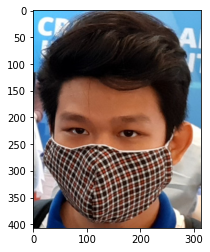

In [32]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/MTuan_Mask.jpg"

model = mask_model
predict = ['BHUY_MASK - 19146194',
 'DHUNG_MASK - 19146016',
 'DTAI_MASK - 19146255 ',
 'MTUAN_MASK - 19146297',
 'QHUY_MASK - 19146195',]
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

array(['DTAI_MASK - 19146255'], dtype='<U21')

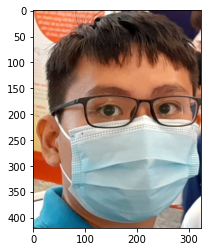

In [34]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/DTai_Mask.jpg"

model = mask_model
predict = ['BHUY_MASK - 19146194',
 'DHUNG_MASK - 19146016',
 'DTAI_MASK - 19146255 ',
 'MTUAN_MASK - 19146297',
 'QHUY_MASK - 19146195',]
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

array(['DHUNG_MASK - 19146016'], dtype='<U21')

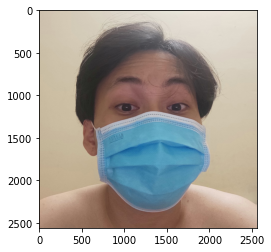

In [36]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/hung0906 (6).jpg"

model = mask_model
predict = ['BHUY_MASK - 19146194',
 'DHUNG_MASK - 19146016',
 'DTAI_MASK - 19146255 ',
 'MTUAN_MASK - 19146297',
 'QHUY_MASK - 19146195',]
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

array(['MTUAN_MASK - 19146297'], dtype='<U21')

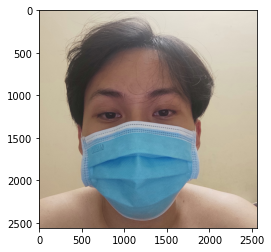

In [37]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/hung0906 (8).jpg"

model = mask_model
predict = ['BHUY_MASK - 19146194',
 'DHUNG_MASK - 19146016',
 'DTAI_MASK - 19146255 ',
 'MTUAN_MASK - 19146297',
 'QHUY_MASK - 19146195',]
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

array(['DHUNG_WITHOUTMASK - 19146016'], dtype='<U28')

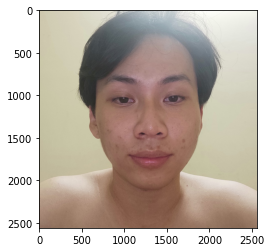

In [39]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/hung0906 (3).jpg"

model = withoutmask_model
predict = ['BHUY_WITHOUTMASK - 19146194',
 'DHUNG_WITHOUTMASK - 19146016',
 'DTAI_WITHOUTMASK 19146255',
 'MTUAN_WITHOUTMASK -19146297',
 'QHUY_WITHOUTMASK -19146195']
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

array(['BHUY_WITHOUTMASK - 19146194'], dtype='<U28')

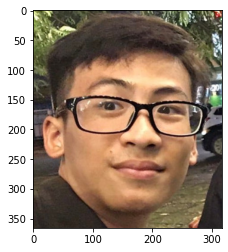

In [40]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/BHuyWithout.jpg"

model = withoutmask_model
predict = ['BHUY_WITHOUTMASK - 19146194',
 'DHUNG_WITHOUTMASK - 19146016',
 'DTAI_WITHOUTMASK 19146255',
 'MTUAN_WITHOUTMASK -19146297',
 'QHUY_WITHOUTMASK -19146195']
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

array(['BHUY_MASK - 19146194'], dtype='<U21')

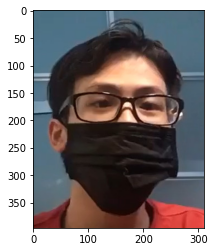

In [42]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/BHuyMask.jpg"

model = mask_model
predict = ['BHUY_MASK - 19146194',
 'DHUNG_MASK - 19146016',
 'DTAI_MASK - 19146255 ',
 'MTUAN_MASK - 19146297',
 'QHUY_MASK - 19146195',]
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

# 1 MODEL

In [44]:
# Important variables 
input_size = [150,150]
batch = 32

input_shape = (150,150,3)
maxpooling_size = (2,2)

In [45]:
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2,shear_range=0.2, zoom_range = 0.2,)    

train_dataset = image_generator.flow_from_directory(batch_size=batch,
                                                 directory='../input/cl3dataset-final/DATASET_FINAL_19146195/DATASET_FINAL_19146195/DATASET_10P_FINAL',
                                                 shuffle=True,
                                                 target_size= input_size, 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=batch,
                                                 directory='../input/cl3dataset-final/DATASET_FINAL_19146195/DATASET_FINAL_19146195/DATASET_10P_FINAL',
                                                 shuffle=True,
                                                 target_size=input_size, 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 3688 images belonging to 10 classes.
Found 918 images belonging to 10 classes.


In [46]:
train_dataset.class_indices

{'BHUY_MASK': 0,
 'BHUY_WITHOUTMASK': 1,
 'DHUNG_MASK': 2,
 'DHUNG_WITHOUTMASK': 3,
 'DTAI_MASK': 4,
 'DTAI_WITHOUTMASK': 5,
 'MTUAN_MASK': 6,
 'MTUAN_WITHOUTMASK': 7,
 'QHUY_MASK': 8,
 'QHUY_WITHOUTMASK': 9}

In [48]:
# from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input,MaxPooling2D
model = Sequential()
model.add(Conv2D(128,(3,3), kernel_initializer='he_uniform',padding='same', activation='relu', input_shape=(150,150,3)))
#model.add(Conv2D(128, kernel_size=3, activation='relu'))
# model.add(MaxPool2D(pool_size=3, strides=2))
model.add(MaxPooling2D((2,2)))


model.add(Conv2D(128,(3,3),kernel_initializer='he_uniform',padding='same', activation='relu'))
#model.add(Conv2D(128, kernel_size=3, activation='relu'))
# model.add(MaxPool2D(pool_size=3, strides=2))
model.add(MaxPooling2D((2,2)))

              
model.add(Conv2D(256,(3,3),kernel_initializer='he_uniform',padding='same', activation='relu'))
#model.add(Conv2D(256, kernel_size=3, activation='relu'))
# model.add(MaxPool2D(pool_size=3, strides=2))
model.add(MaxPooling2D((2,2)))


# model.add(Conv2D(512, (3,3),kernel_initializer='he_uniform',padding='same', activation='relu'))
# model.add(Conv2D(512, kernel_size=3, activation='relu'))
# model.add(MaxPool2D(pool_size=3, strides=2))
# model.add(MaxPooling2D((2,2)))


from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dense(512, activation='relu')) 


model.add(Dense(10,activation='softmax', name ='wearmask'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 150, 150, 128)     3584      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 75, 75, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 75, 75, 128)       147584    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 37, 37, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 37, 37, 256)       295168    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 18, 18, 256)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 82944)            

In [49]:
from tensorflow.keras.optimizers import SGD
opt = SGD(learning_rate = 0.001, momentum = 0.9)
model.compile(optimizer = opt, loss ='categorical_crossentropy', metrics = ['accuracy'])
history=model.fit(train_dataset,batch_size=batch,epochs=200, verbose=1,validation_data=validation_dataset)

Epoch 1/200
116/116 [==============================] - 52s 443ms/step - loss: 1.7664 - accuracy: 0.3666 - val_loss: 1.7064 - val_accuracy: 0.5795
Epoch 2/200
116/116 [==============================] - 28s 243ms/step - loss: 0.8376 - accuracy: 0.7115 - val_loss: 1.5310 - val_accuracy: 0.6656
Epoch 3/200
116/116 [==============================] - 29s 246ms/step - loss: 0.4304 - accuracy: 0.8568 - val_loss: 0.9095 - val_accuracy: 0.7070
Epoch 4/200
116/116 [==============================] - 29s 250ms/step - loss: 0.3165 - accuracy: 0.8907 - val_loss: 0.6825 - val_accuracy: 0.7691
Epoch 5/200
116/116 [==============================] - 29s 249ms/step - loss: 0.2212 - accuracy: 0.9159 - val_loss: 0.8944 - val_accuracy: 0.7407
Epoch 6/200
116/116 [==============================] - 29s 253ms/step - loss: 0.1855 - accuracy: 0.9252 - val_loss: 0.6350 - val_accuracy: 0.7810
Epoch 7/200
116/116 [==============================] - 31s 267ms/step - loss: 0.1394 - accuracy: 0.9379 - val_loss: 0.5680 -

In [76]:
model.save('Final_10Main2106.h5')

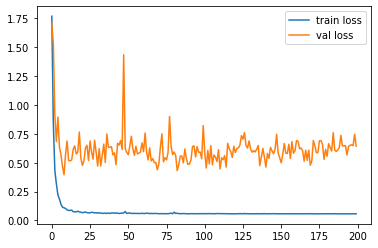

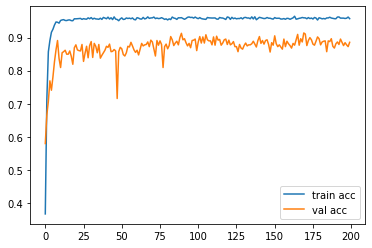

<Figure size 432x288 with 0 Axes>

In [51]:
# plot the loss
import matplotlib.pyplot as plt
history = history
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

array(['QHUY_MASK - 19146195'], dtype='<U24')

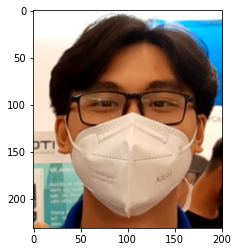

In [62]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/QhuyMask (1).jpg"

model = model
predict = ['BHUY_MASK - 19146194',
 'BHUY_WITHOUT - 19146194',
 'DHUNG_MASK - 19146255',
 'DHUNG_WITHOUT - 19146255',
 'DTAI_MASK - 19146255',
 'DTAI_WITHOUT - 19146255',
 'MTUAN_MASK - 19146297',
 'MTUAN_WITHOUT - 19146297',
 'QHUY_MASK - 19146195',
 'QHUY_WITHOUT - 19146195']
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

array(['QHUY_WITHOUT - 19146195'], dtype='<U24')

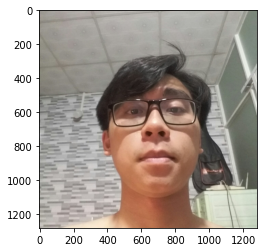

In [64]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/huy0906 (4).jpg"

model = model
predict = ['BHUY_MASK - 19146194',
 'BHUY_WITHOUT - 19146194',
 'DHUNG_MASK - 19146255',
 'DHUNG_WITHOUT - 19146255',
 'DTAI_MASK - 19146255',
 'DTAI_WITHOUT - 19146255',
 'MTUAN_MASK - 19146297',
 'MTUAN_WITHOUT - 19146297',
 'QHUY_MASK - 19146195',
 'QHUY_WITHOUT - 19146195']
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

array(['MTUAN_MASK - 19146297'], dtype='<U24')

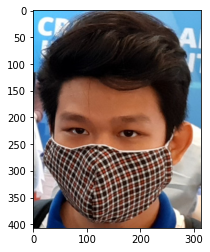

In [66]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/MTuan_Mask.jpg"

model = model
predict = ['BHUY_MASK - 19146194',
 'BHUY_WITHOUT - 19146194',
 'DHUNG_MASK - 19146255',
 'DHUNG_WITHOUT - 19146255',
 'DTAI_MASK - 19146255',
 'DTAI_WITHOUT - 19146255',
 'MTUAN_MASK - 19146297',
 'MTUAN_WITHOUT - 19146297',
 'QHUY_MASK - 19146195',
 'QHUY_WITHOUT - 19146195']
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

array(['MTUAN_WITHOUT - 19146297'], dtype='<U24')

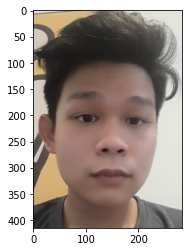

In [68]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/demo_test/TEST (1).jpg"

model = model
predict = ['BHUY_MASK - 19146194',
 'BHUY_WITHOUT - 19146194',
 'DHUNG_MASK - 19146255',
 'DHUNG_WITHOUT - 19146255',
 'DTAI_MASK - 19146255',
 'DTAI_WITHOUT - 19146255',
 'MTUAN_MASK - 19146297',
 'MTUAN_WITHOUT - 19146297',
 'QHUY_MASK - 19146195',
 'QHUY_WITHOUT - 19146195']
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

array(['DTAI_MASK - 19146255'], dtype='<U24')

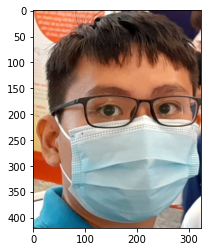

In [70]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/DTai_Mask.jpg"

model = model
predict = ['BHUY_MASK - 19146194',
 'BHUY_WITHOUT - 19146194',
 'DHUNG_MASK - 19146255',
 'DHUNG_WITHOUT - 19146255',
 'DTAI_MASK - 19146255',
 'DTAI_WITHOUT - 19146255',
 'MTUAN_MASK - 19146297',
 'MTUAN_WITHOUT - 19146297',
 'QHUY_MASK - 19146195',
 'QHUY_WITHOUT - 19146195']
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

array(['DTAI_WITHOUT - 19146255'], dtype='<U24')

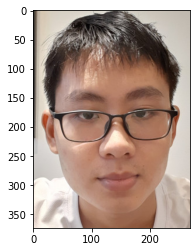

In [72]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/demo_test/TEST (2).jpg"

model = model
predict = ['BHUY_MASK - 19146194',
 'BHUY_WITHOUT - 19146194',
 'DHUNG_MASK - 19146255',
 'DHUNG_WITHOUT - 19146255',
 'DTAI_MASK - 19146255',
 'DTAI_WITHOUT - 19146255',
 'MTUAN_MASK - 19146297',
 'MTUAN_WITHOUT - 19146297',
 'QHUY_MASK - 19146195',
 'QHUY_WITHOUT - 19146195']
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/QhuyMask (1).jpg"

model = model
predict = ['BHUY_MASK',
 'BHUY_WITHOUT',
 'DHUNG_MASK',
 'DHUNG_WITHOUT',
 'DTAI_MASK',
 'DTAI_WITHOUT',
 'MTUAN_MASK',
 'MTUAN_WITHOUT',
 'QHUY_MASK',
 'QHUY_WITHOUT']
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

array(['BHUY_WITHOUT - 19146194'], dtype='<U24')

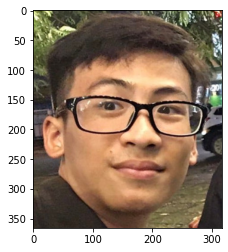

In [75]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/BHuyWithout.jpg"

model = model
predict = ['BHUY_MASK - 19146194',
 'BHUY_WITHOUT - 19146194',
 'DHUNG_MASK - 19146255',
 'DHUNG_WITHOUT - 19146255',
 'DTAI_MASK - 19146255',
 'DTAI_WITHOUT - 19146255',
 'MTUAN_MASK - 19146297',
 'MTUAN_WITHOUT - 19146297',
 'QHUY_MASK - 19146195',
 'QHUY_WITHOUT - 19146195']
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

array(['BHUY_MASK - 19146194'], dtype='<U24')

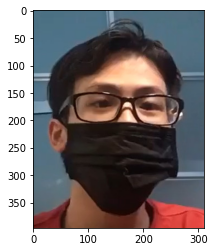

In [78]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/BHuyMask.jpg"

model = model
predict = ['BHUY_MASK - 19146194',
 'BHUY_WITHOUT - 19146194',
 'DHUNG_MASK - 19146255',
 'DHUNG_WITHOUT - 19146255',
 'DTAI_MASK - 19146255',
 'DTAI_WITHOUT - 19146255',
 'MTUAN_MASK - 19146297',
 'MTUAN_WITHOUT - 19146297',
 'QHUY_MASK - 19146195',
 'QHUY_WITHOUT - 19146195']
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

array(['DHUNG_WITHOUT - 19146255'], dtype='<U24')

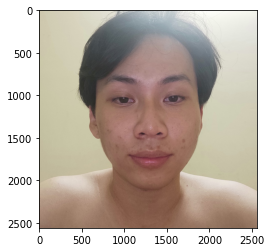

In [80]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/hung0906 (3).jpg"

model = model
predict = ['BHUY_MASK - 19146194',
 'BHUY_WITHOUT - 19146194',
 'DHUNG_MASK - 19146255',
 'DHUNG_WITHOUT - 19146255',
 'DTAI_MASK - 19146255',
 'DTAI_WITHOUT - 19146255',
 'MTUAN_MASK - 19146297',
 'MTUAN_WITHOUT - 19146297',
 'QHUY_MASK - 19146195',
 'QHUY_WITHOUT - 19146195']
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]

array(['DHUNG_MASK - 19146255'], dtype='<U24')

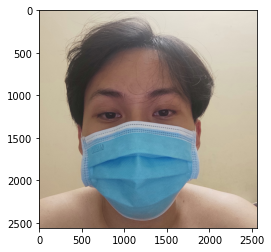

In [82]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "../input/testdataset-cl3b-ver2/hung0906 (8).jpg"

model = model
predict = ['BHUY_MASK - 19146194',
 'BHUY_WITHOUT - 19146194',
 'DHUNG_MASK - 19146255',
 'DHUNG_WITHOUT - 19146255',
 'DTAI_MASK - 19146255',
 'DTAI_WITHOUT - 19146255',
 'MTUAN_MASK - 19146297',
 'MTUAN_WITHOUT - 19146297',
 'QHUY_MASK - 19146195',
 'QHUY_WITHOUT - 19146195']
predict = np.array(predict)

img = load_img(filename,target_size=input_size)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
img1 =load_img(filename)
plt.imshow(img1)

# Du doan ket qua
result = np.argmax(model.predict(img),axis=-1)
predict[result]